# Initial exploration of the CRISPR dependency data

In [1]:
import pathlib
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Set constants
adult_threshold = 18
liquid_tumors = ["Leukemia", "Lymphoma"]

In [3]:
# Set i/o paths and files
data_dir = pathlib.Path("../0.data-download/data")
fig_dir = pathlib.Path("figures")
fig_dir.mkdir(exist_ok=True)

# Input files
model_input_file = pathlib.Path(f"{data_dir}/Model.csv")
crispr_input_file = pathlib.Path(f"{data_dir}/CRISPRGeneEffect.csv")
gene_input_file = pathlib.Path(f"{data_dir}/depmap_gene_meta.tsv")

# Output figures
cancer_type_output_figure = pathlib.Path(f"{fig_dir}/sample_cancer_types_bar_chart.png")
age_category_output_figure = pathlib.Path(f"{fig_dir}/age_categories_bar_chart.png")
age_distribution_output_figure = pathlib.Path(
    f"{fig_dir}/sample_age_distribution_plot.png"
)
sex_output_figure = pathlib.Path(f"{fig_dir}/sample_gender_bar_chart.png")
pediatric_cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/pediatric_sample_cancer_types_bar_chart.png"
)
adult_cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/adult_sample_cancer_types_bar_chart.png"
)

In [4]:
# Load model data
model_df = pd.read_csv(model_input_file)

print(model_df.shape)
model_df.head(3)

(1959, 43)


,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,EngineeredModel,TissueOrigin,ModelDerivationMaterial,PublicComments,CCLEName,HCMIID,WTSIMasterCellID,SangerModelID,COSMICID,DateSharedIndbGaP
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,2201.0,SIDM00105,905933.0,NaN
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,55.0,SIDM00829,905938.0,NaN
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,NaN,SIDM00891,NaN,NaN


In [5]:
# Load gene effect data
gene_dependency_df = pd.read_csv(crispr_input_file)

print(gene_dependency_df.shape)
gene_dependency_df.head(3)

(1150, 18444)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,-0.134132,0.029103,0.016454,-0.137540,-0.047273,0.181367,-0.082437,-0.059023,0.194592,...,-0.123528,0.085140,0.181954,0.239474,0.172965,-0.230327,0.055657,0.044296,0.107361,-0.410449
1,ACH-000004,-0.001436,-0.080068,-0.125263,-0.027607,-0.053838,-0.151272,0.240094,-0.038922,0.186438,...,-0.186899,-0.359257,0.202271,0.057740,0.089295,0.086703,-0.304930,0.086858,0.254538,-0.087671
2,ACH-000005,-0.144940,0.026541,0.160605,0.088015,-0.202605,-0.243420,0.133726,-0.034895,-0.126105,...,-0.309668,-0.344502,-0.056160,-0.092447,-0.015550,-0.170380,-0.080934,-0.059685,0.030254,-0.145055


In [6]:
# Load gene data for subsetting
gene_meta_df = pd.read_csv(gene_input_file, sep="\t")

print(gene_meta_df.shape)
gene_meta_df.head(3)

(2921, 19)


,Name,symbol,entrezgene,Function_1,Function_2,Function_3,Function_4,Loading_1,Loading_2,Loading_3,Loading_4,Recon_Pearson,Location,Location_URL,DepMap_URL,GeneCard_URL,NIH_Gene_URL,Pubmed_Count,Understudied
0,AAAS (8086),AAAS,8086,V105,V112,V148,V87,0.486503,0.319132,0.250985,-0.085859,0.564515,"mitochondrial outer membrane, peroxisome",https://humancellmap.org/explore/reports/prey?...,https://depmap.org/portal/gene/AAAS?tab=overview,https://www.genecards.org/cgi-bin/carddisp.pl?...,https://www.ncbi.nlm.nih.gov/gene/?term=8086,93.0,False
1,AAMP (14),AAMP,14,V16,V37,V78,V24,0.214734,0.196146,-0.176450,0.163906,0.386308,NaN,NaN,https://depmap.org/portal/gene/AAMP?tab=overview,https://www.genecards.org/cgi-bin/carddisp.pl?...,https://www.ncbi.nlm.nih.gov/gene/?term=14,49.0,False
2,AARS (16),AARS,16,V10,V63,V1,V98,0.417229,0.251385,0.142732,0.075179,0.561534,NaN,NaN,https://depmap.org/portal/gene/AARS?tab=overview,https://www.genecards.org/cgi-bin/carddisp.pl?...,https://www.ncbi.nlm.nih.gov/gene/?term=16,80.0,False


## Describe input data

In [7]:
# Model.csv visualization
# How many samples from Model.csv?
n_samples_model = len(model_df["ModelID"].unique())
print(f"Number of samples documented in Model.csv: {n_samples_model} \n")

# How many samples from CRISPRGeneDependency.csv?
n_samples_gene = len(gene_dependency_df["ModelID"].unique())
print(f"Number of samples measured in CRISPRGeneDependency.csv: {n_samples_gene} \n")

# Identify which samples are included in both Model.csv and CRISPRGeneDependency.csv
sample_overlap = list(set(model_df["ModelID"]) & set(gene_dependency_df["ModelID"]))

# count the number of samples that overlap in both data sets
print(f"Samples measured in both: {len(sample_overlap)} \n")

# count the number of genes we will use to subset
print(f"Number of genes that pass QC: {gene_meta_df.symbol.nunique()} \n")

# How many different types of cancer?
n_cancer_types = model_df.query("ModelID in @sample_overlap")[
    "OncotreePrimaryDisease"
].nunique()
print(f"Number of Cancer Types: \n {n_cancer_types} \n")

Number of samples documented in Model.csv: 1959 

Number of samples measured in CRISPRGeneDependency.csv: 1150 

Samples measured in both: 1150 

Number of genes that pass QC: 2921 

Number of Cancer Types: 
 75 



figures/sample_cancer_types_bar_chart.png


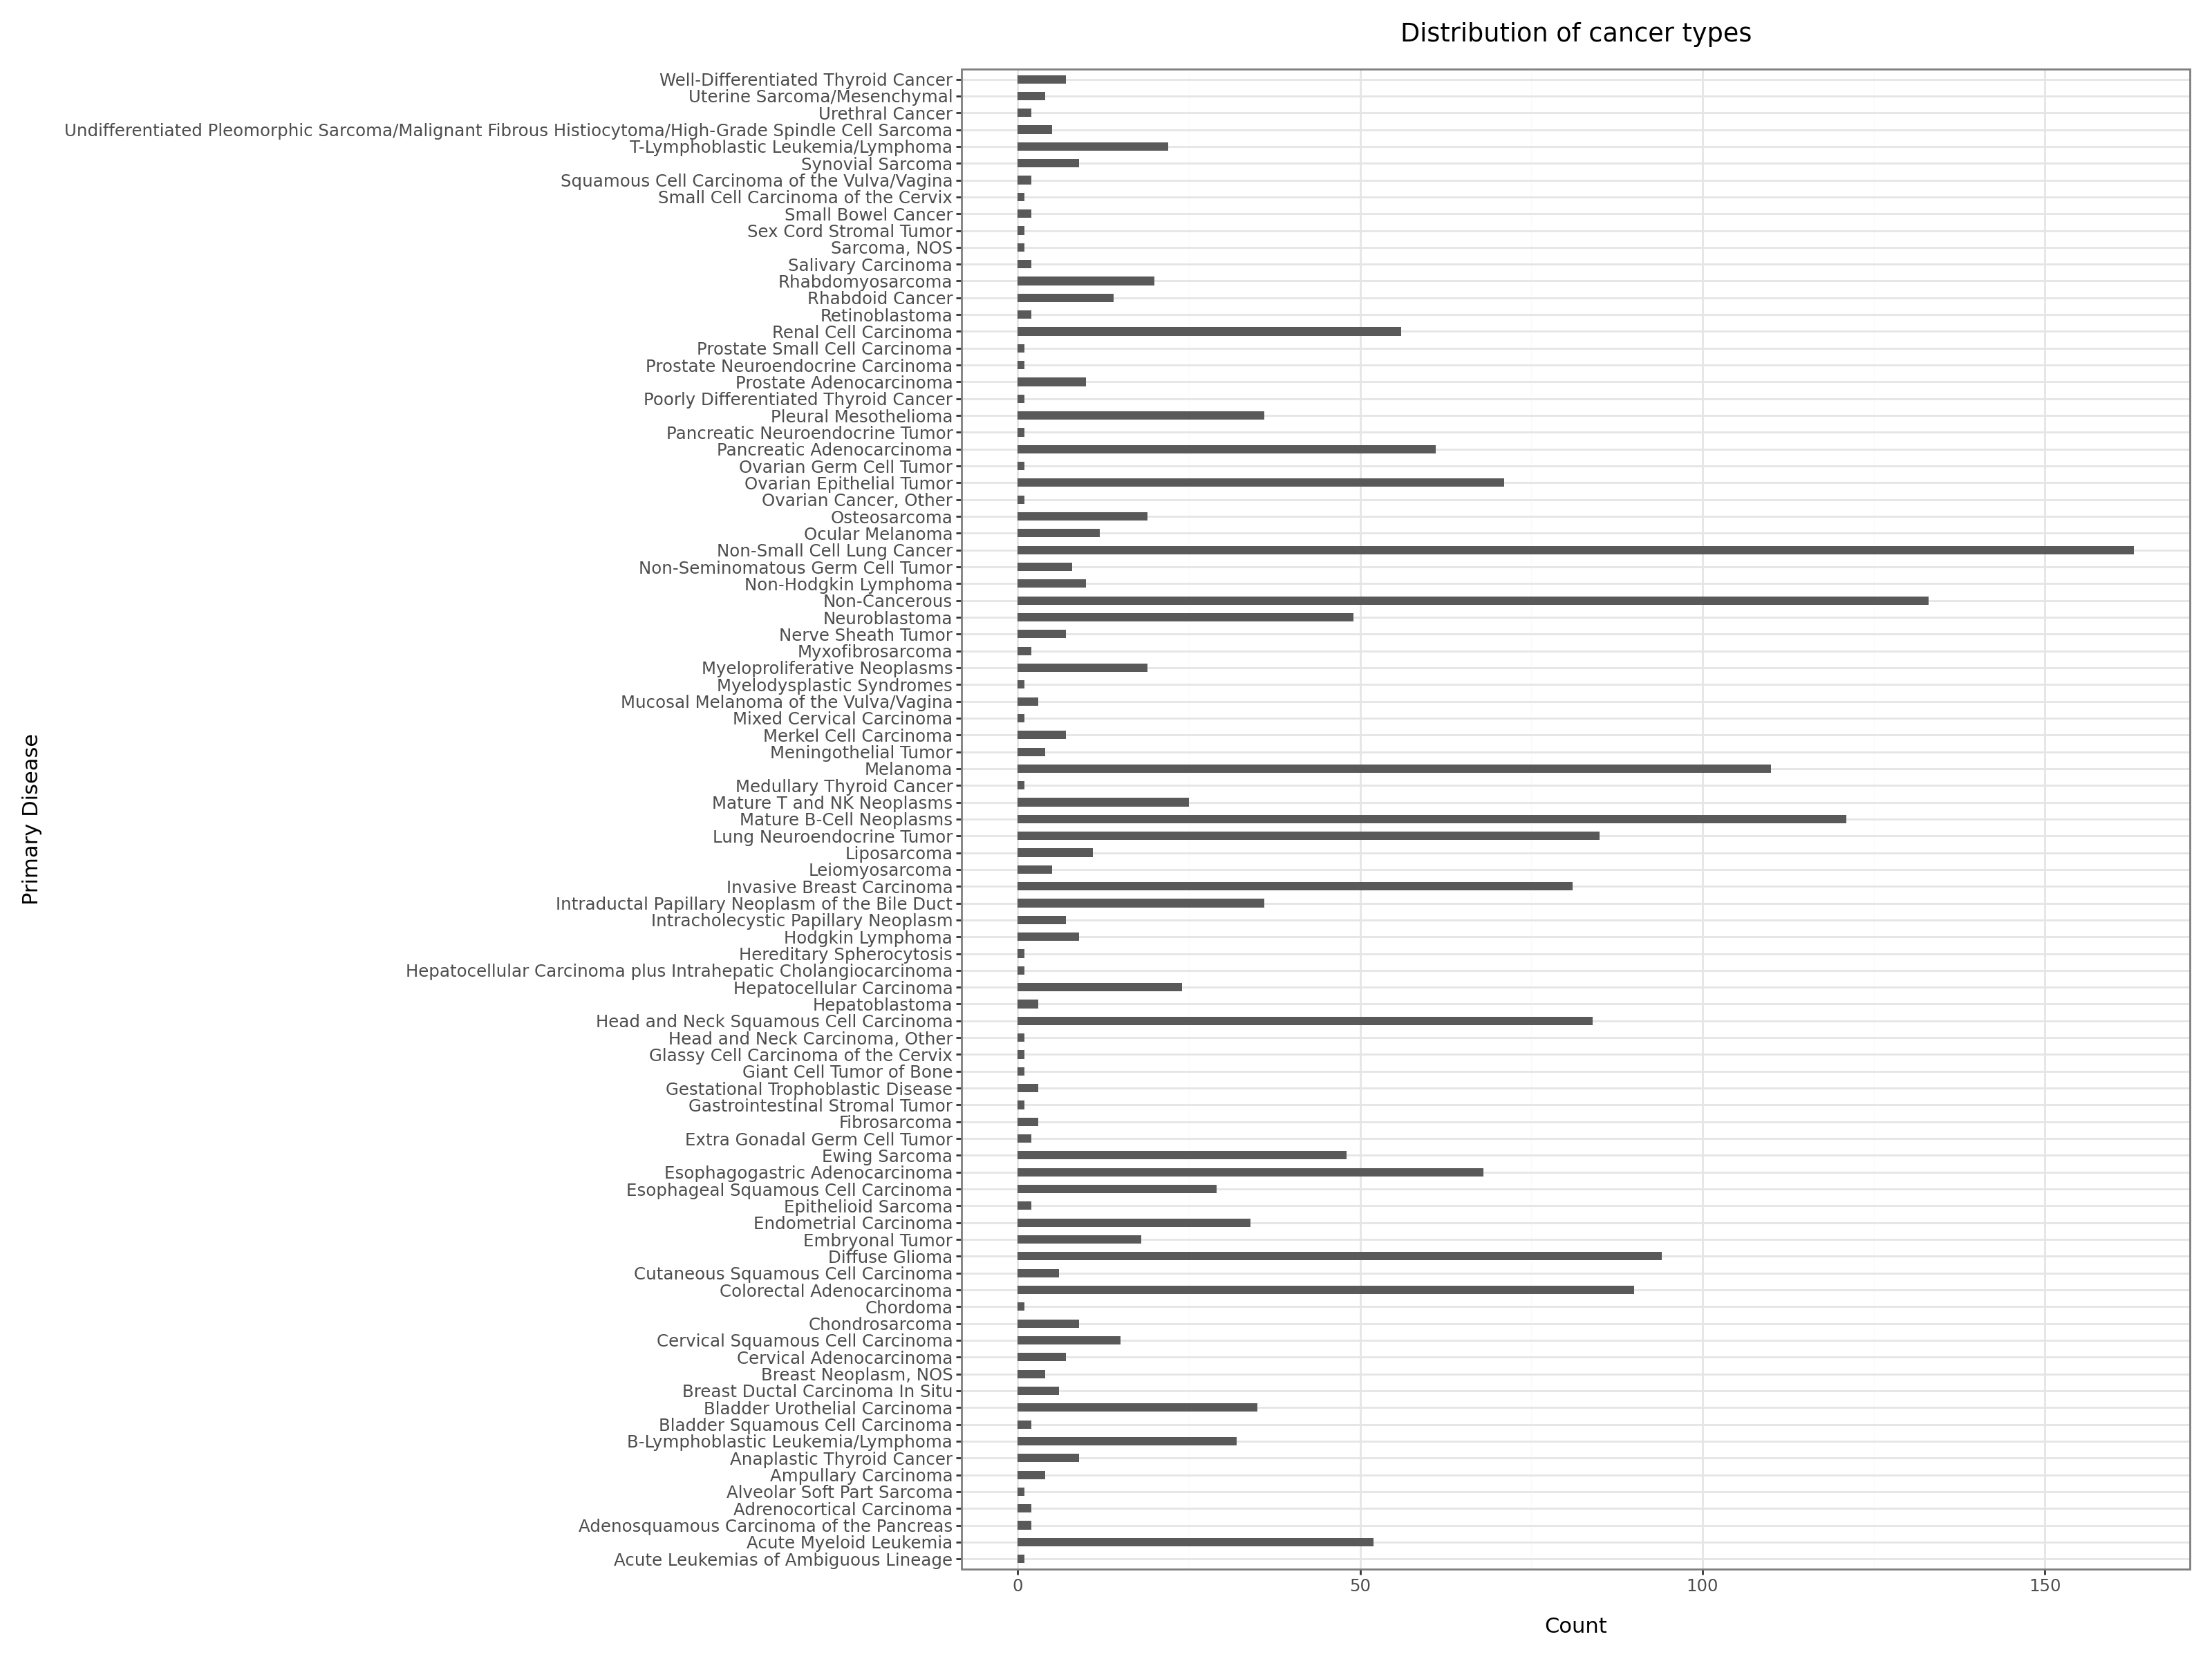

In [9]:
# Visualize cancer type distribution
cancer_types_bar = (
    gg.ggplot(model_df, gg.aes(x="OncotreePrimaryDisease"))
    + gg.geom_bar(width = 0.5, position = gg.position_dodge2(padding = 0.5))
    + gg.coord_flip()
    + gg.xlab("Primary Disease")
    + gg.ylab("Count")
    + gg.ggtitle("Distribution of cancer types")
    + gg.theme_bw()
    + gg.theme(figure_size = (16, 12))
)

cancer_types_bar.save(cancer_type_output_figure, dpi=500, height=11, width=12)
print(cancer_type_output_figure)

cancer_types_bar

## Visualize age categories and distribution

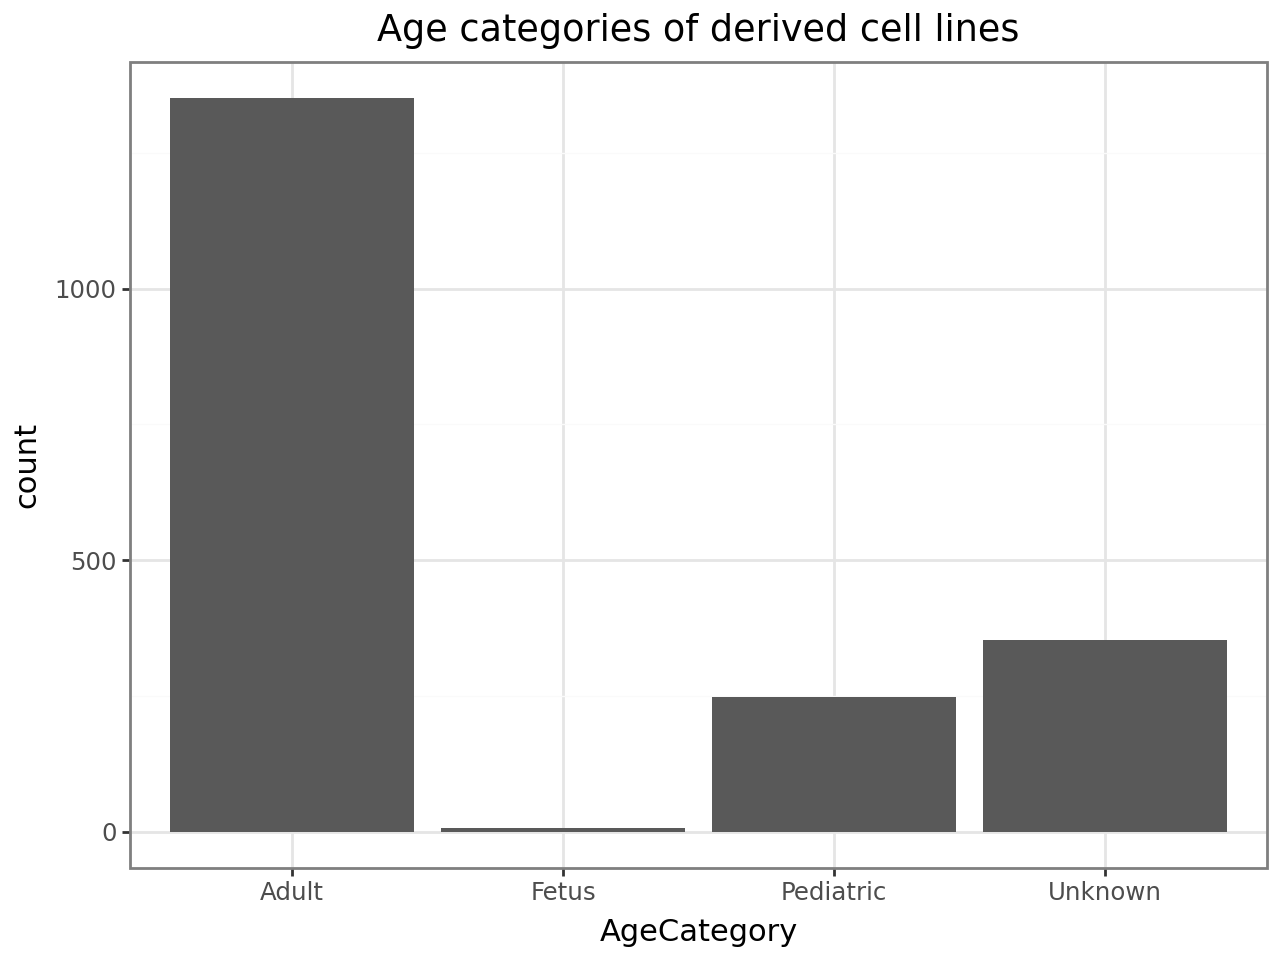

In [10]:
age_categories_bar = (
    gg.ggplot(model_df, gg.aes(x="AgeCategory"))
    + gg.geom_bar()
    + gg.ggtitle(
        f"Age categories of derived cell lines"
    )
    + gg.theme_bw()
)

age_categories_bar.save(age_category_output_figure, dpi=500)

age_categories_bar

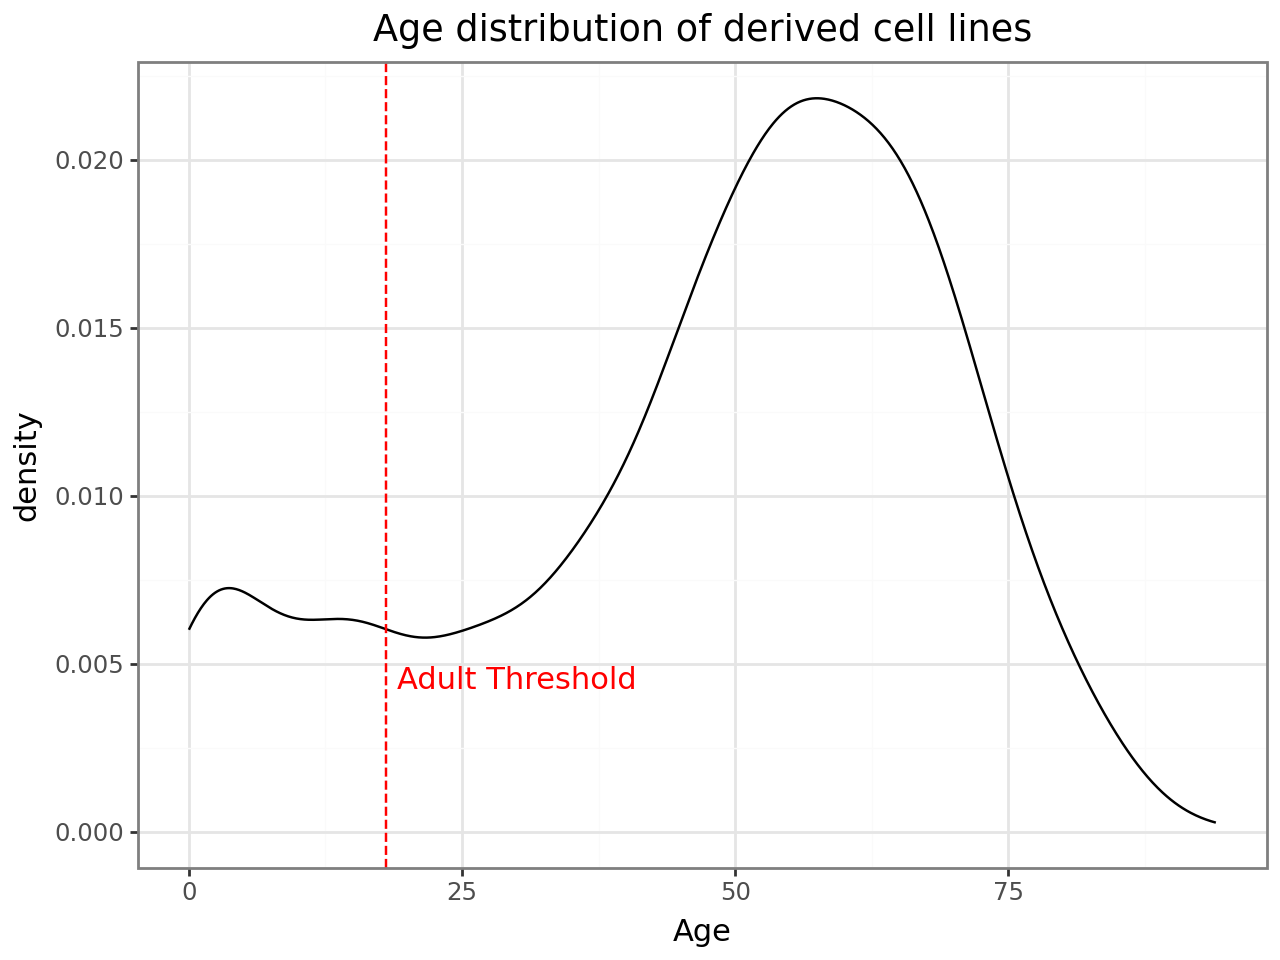

In [11]:
age_distribution_plot = (
    gg.ggplot(model_df, gg.aes(x="Age"))
    + gg.geom_density()
    + gg.geom_vline(xintercept=adult_threshold, linetype="dashed", color="red")
    + gg.annotate(geom="text", x=30, y = 0.0045, label="Adult Threshold", color="red")    
    + gg.ggtitle(
        f"Age distribution of derived cell lines"
    )
    + gg.theme_bw()
)

age_distribution_plot.save(age_distribution_output_figure, dpi=500)

age_distribution_plot

In [12]:
model_df['AgeCategory'].value_counts()

AgeCategory
Adult        1351
Unknown       353
Pediatric     248
Fetus           7
Name: count, dtype: int64

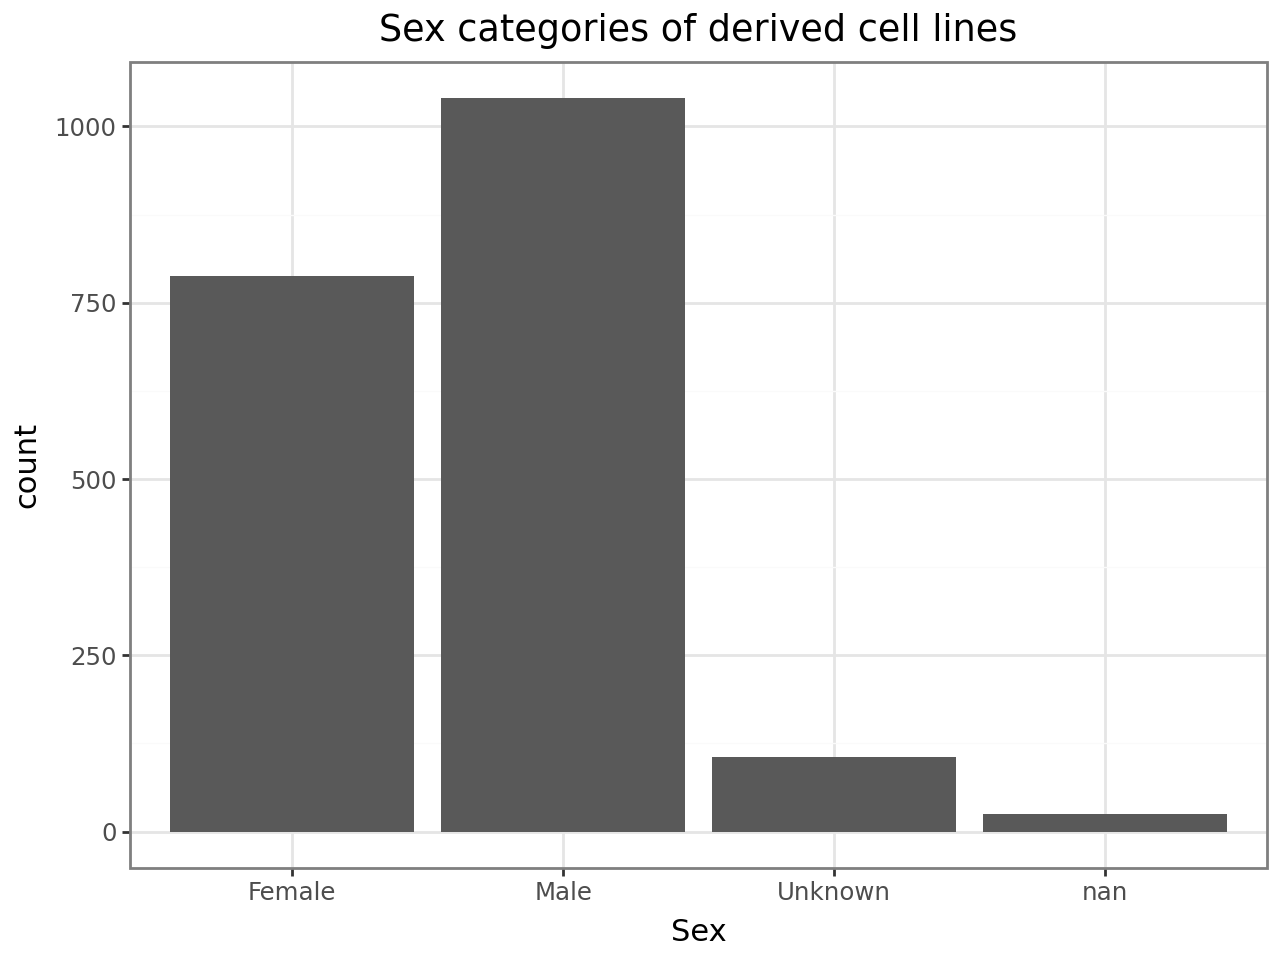

In [13]:
gendersamp_plot = (
    gg.ggplot(model_df, gg.aes(x="Sex"))
    + gg.geom_bar()
    + gg.ggtitle(f"Sex categories of derived cell lines")
    + gg.theme_bw()
)

gendersamp_plot.save(sex_output_figure)

gendersamp_plot

## What cell lines are pediatric cancer?

In [14]:
pediatric_model_df = (
    model_df.query("AgeCategory == 'Pediatric'")
    .query("ModelID in @sample_overlap")
    .reset_index(drop=True)
)

print(pediatric_model_df.shape)
pediatric_model_df.head(3)

(143, 43)


,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,EngineeredModel,TissueOrigin,ModelDerivationMaterial,PublicComments,CCLEName,HCMIID,WTSIMasterCellID,SangerModelID,COSMICID,DateSharedIndbGaP
0,ACH-000039,PT-wGDMGe,SK-N-MC,SKNMC,ES,Bone,Ewing Sarcoma,Ewing Sarcoma,ES,EWS_FLI,...,NaN,NaN,NaN,NaN,SKNMC_BONE,NaN,NaN,SIDM00634,NaN,NaN
1,ACH-000045,PT-zb7Sx0,MV4-11,MV411,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,MV411_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,133.0,SIDM00657,908156.0,NaN
2,ACH-000052,PT-IAac7b,A-673,A673,ES,Bone,Ewing Sarcoma,Ewing Sarcoma,ES,EWS_FLI,...,NaN,NaN,NaN,NaN,A673_BONE,NaN,660.0,SIDM00848,684052.0,NaN


In [15]:
# What are the neuroblastoma models?
pediatric_model_df.query(
    "OncotreeSubtype == 'Neuroblastoma'"
).StrippedCellLineName

5      MHHNB11
10        SIMA
12      CHP212
14       SKNSH
19         NH6
22       KPNYN
24       KELLY
25       SKNAS
29       IMR32
30      SKNBE2
32       SKNFI
35       SKNDZ
57         NB1
82      SHSY5Y
93      CHLA15
94     COGN278
95     COGN305
96      NB1643
98      CHP134
99       GIMEN
100       LAN2
101        NGP
102        NMB
108     CHLA90
111         LS
112       NH12
114        TGW
131       NB69
135      KPNYS
136       NB10
137       NB13
138       NB17
139        NB5
140        NB7
142      SKNMM
Name: StrippedCellLineName, dtype: object

In [16]:
# What is the distribution of pediatric tumor types
pediatric_cancer_counts = pediatric_model_df.OncotreePrimaryDisease.value_counts()
pediatric_cancer_counts

OncotreePrimaryDisease
Neuroblastoma                                                                                          35
Ewing Sarcoma                                                                                          15
Embryonal Tumor                                                                                        14
Rhabdomyosarcoma                                                                                       13
Osteosarcoma                                                                                           11
B-Lymphoblastic Leukemia/Lymphoma                                                                      10
Rhabdoid Cancer                                                                                         9
Acute Myeloid Leukemia                                                                                  7
Mature T and NK Neoplasms                                                                               6
Mature B-Cell Neoplasms

In [17]:
# What is the distribution of pediatric tumor types
pediatric_cancer_counts = (
    pediatric_model_df
    .OncotreePrimaryDisease
    .value_counts()
    .reset_index()
    .rename(columns={"count": "cancer_type_count"})
)
pediatric_cancer_counts

,OncotreePrimaryDisease,cancer_type_count
0,Neuroblastoma,35
1,Ewing Sarcoma,15
2,Embryonal Tumor,14
3,Rhabdomyosarcoma,13
4,Osteosarcoma,11
5,B-Lymphoblastic Leukemia/Lymphoma,10
6,Rhabdoid Cancer,9
7,Acute Myeloid Leukemia,7
8,Mature T and NK Neoplasms,6
9,Mature B-Cell Neoplasms,5


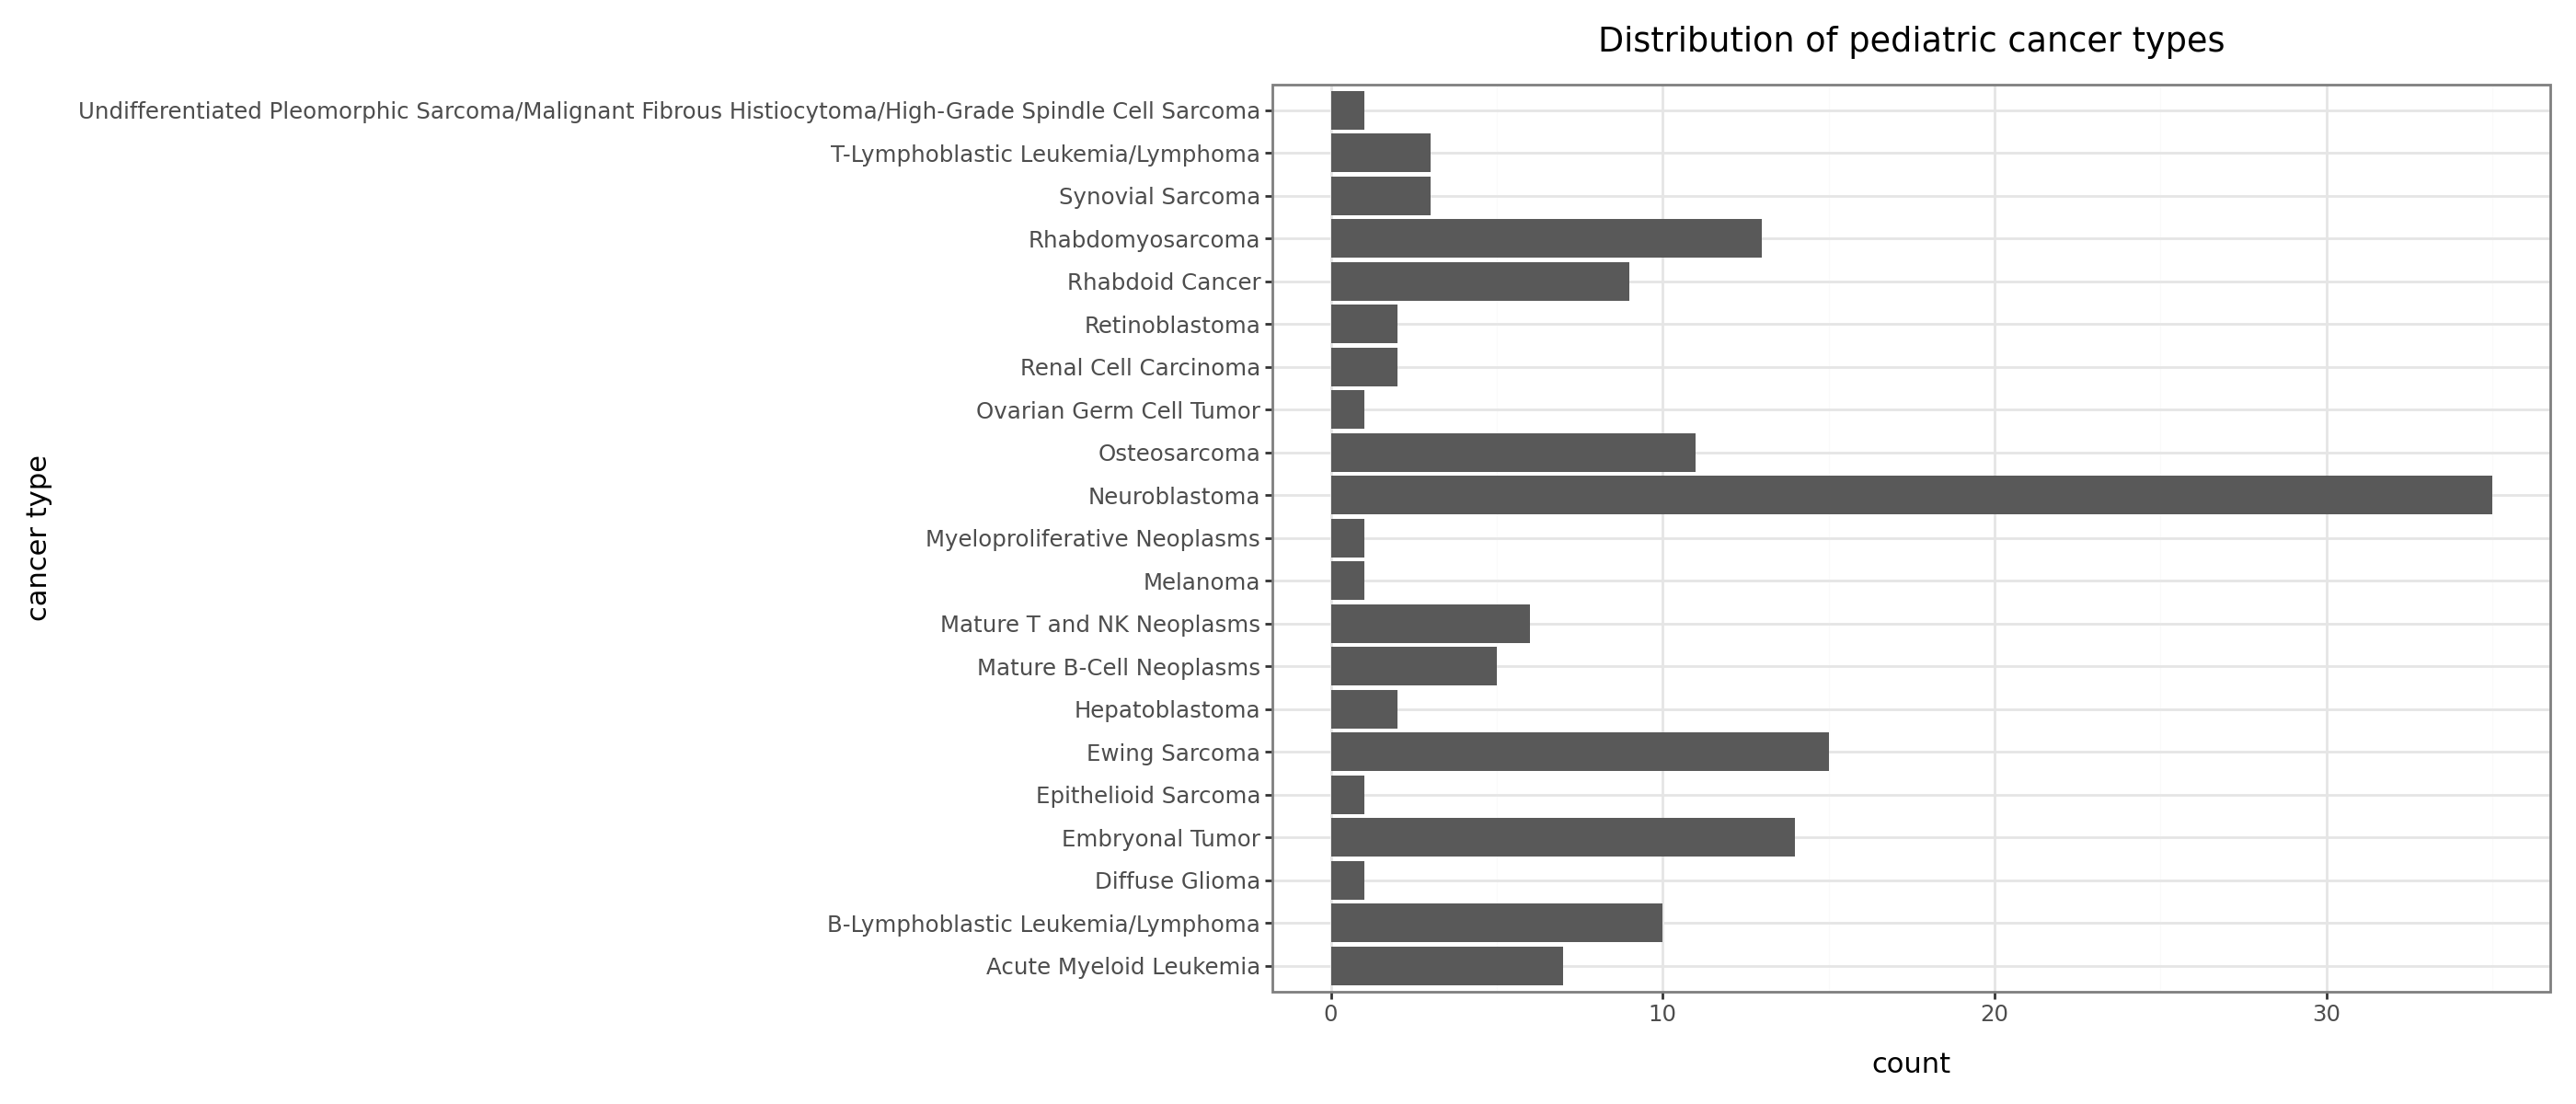

In [18]:
# Visualize pediatric cancer type distribution
ped_cancer_types_bar = (
    gg.ggplot(
        pediatric_cancer_counts.reset_index(), gg.aes(x="OncotreePrimaryDisease", y="cancer_type_count")
    )
    + gg.geom_bar(stat="identity")
    + gg.coord_flip()
    + gg.ggtitle("Distribution of pediatric cancer types")
    + gg.ylab("count")
    + gg.xlab("cancer type")
    + gg.theme_bw()
    + gg.theme(figure_size = (14, 6))
)

ped_cancer_types_bar.save(pediatric_cancer_type_output_figure, dpi=500, height=6, width=12)

ped_cancer_types_bar

In [19]:
# Pediatric solid vs liquid tumors
cancer_types = pediatric_model_df['OncotreePrimaryDisease'].tolist()

ped_liquid = []
ped_non_liquid = []

for cancer_type in cancer_types:
    if liquid_tumors[0] in cancer_type or liquid_tumors[1] in cancer_type:
        ped_liquid.append(cancer_type)
    else:
        ped_non_liquid.append(cancer_type)

print("The number of pediatric solid tumors:")
print(len(ped_non_liquid))

print("The number of pediatric liquid tumors:")
print(len(ped_liquid))

The number of pediatric solid tumors:
123
The number of pediatric liquid tumors:
20


## What cell lines are adult cancer?

In [20]:
adult_model_df = (
    model_df.query("AgeCategory == 'Adult'")
    .query("ModelID in @sample_overlap")
    .reset_index(drop=True)
)

print(adult_model_df.shape)
adult_model_df.head(3)

(815, 43)


,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,EngineeredModel,TissueOrigin,ModelDerivationMaterial,PublicComments,CCLEName,HCMIID,WTSIMasterCellID,SangerModelID,COSMICID,DateSharedIndbGaP
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,2201.0,SIDM00105,905933.0,NaN
1,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,783.0,SIDM00594,907053.0,NaN
2,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,SIDM00593,NaN,NaN


In [21]:
# What is the distribution of adult tumor types
adult_cancer_counts = adult_model_df.OncotreePrimaryDisease.value_counts()
adult_cancer_counts

OncotreePrimaryDisease
Non-Small Cell Lung Cancer               80
Diffuse Glioma                           62
Head and Neck Squamous Cell Carcinoma    60
Colorectal Adenocarcinoma                51
Melanoma                                 48
                                         ..
Myelodysplastic Syndromes                 1
Poorly Differentiated Thyroid Cancer      1
Fibrosarcoma                              1
Sarcoma, NOS                              1
Salivary Carcinoma                        1
Name: count, Length: 66, dtype: int64

In [22]:
# What is the distribution of adult tumor types
adult_cancer_counts = (
    adult_model_df
    .OncotreePrimaryDisease
    .value_counts()
    .reset_index()
    .rename(columns={"count": "cancer_type_count"})
)

adult_cancer_counts

,OncotreePrimaryDisease,cancer_type_count
0,Non-Small Cell Lung Cancer,80
1,Diffuse Glioma,62
2,Head and Neck Squamous Cell Carcinoma,60
3,Colorectal Adenocarcinoma,51
4,Melanoma,48
...,...,...
61,Myelodysplastic Syndromes,1
62,Poorly Differentiated Thyroid Cancer,1
63,Fibrosarcoma,1
64,"Sarcoma, NOS",1


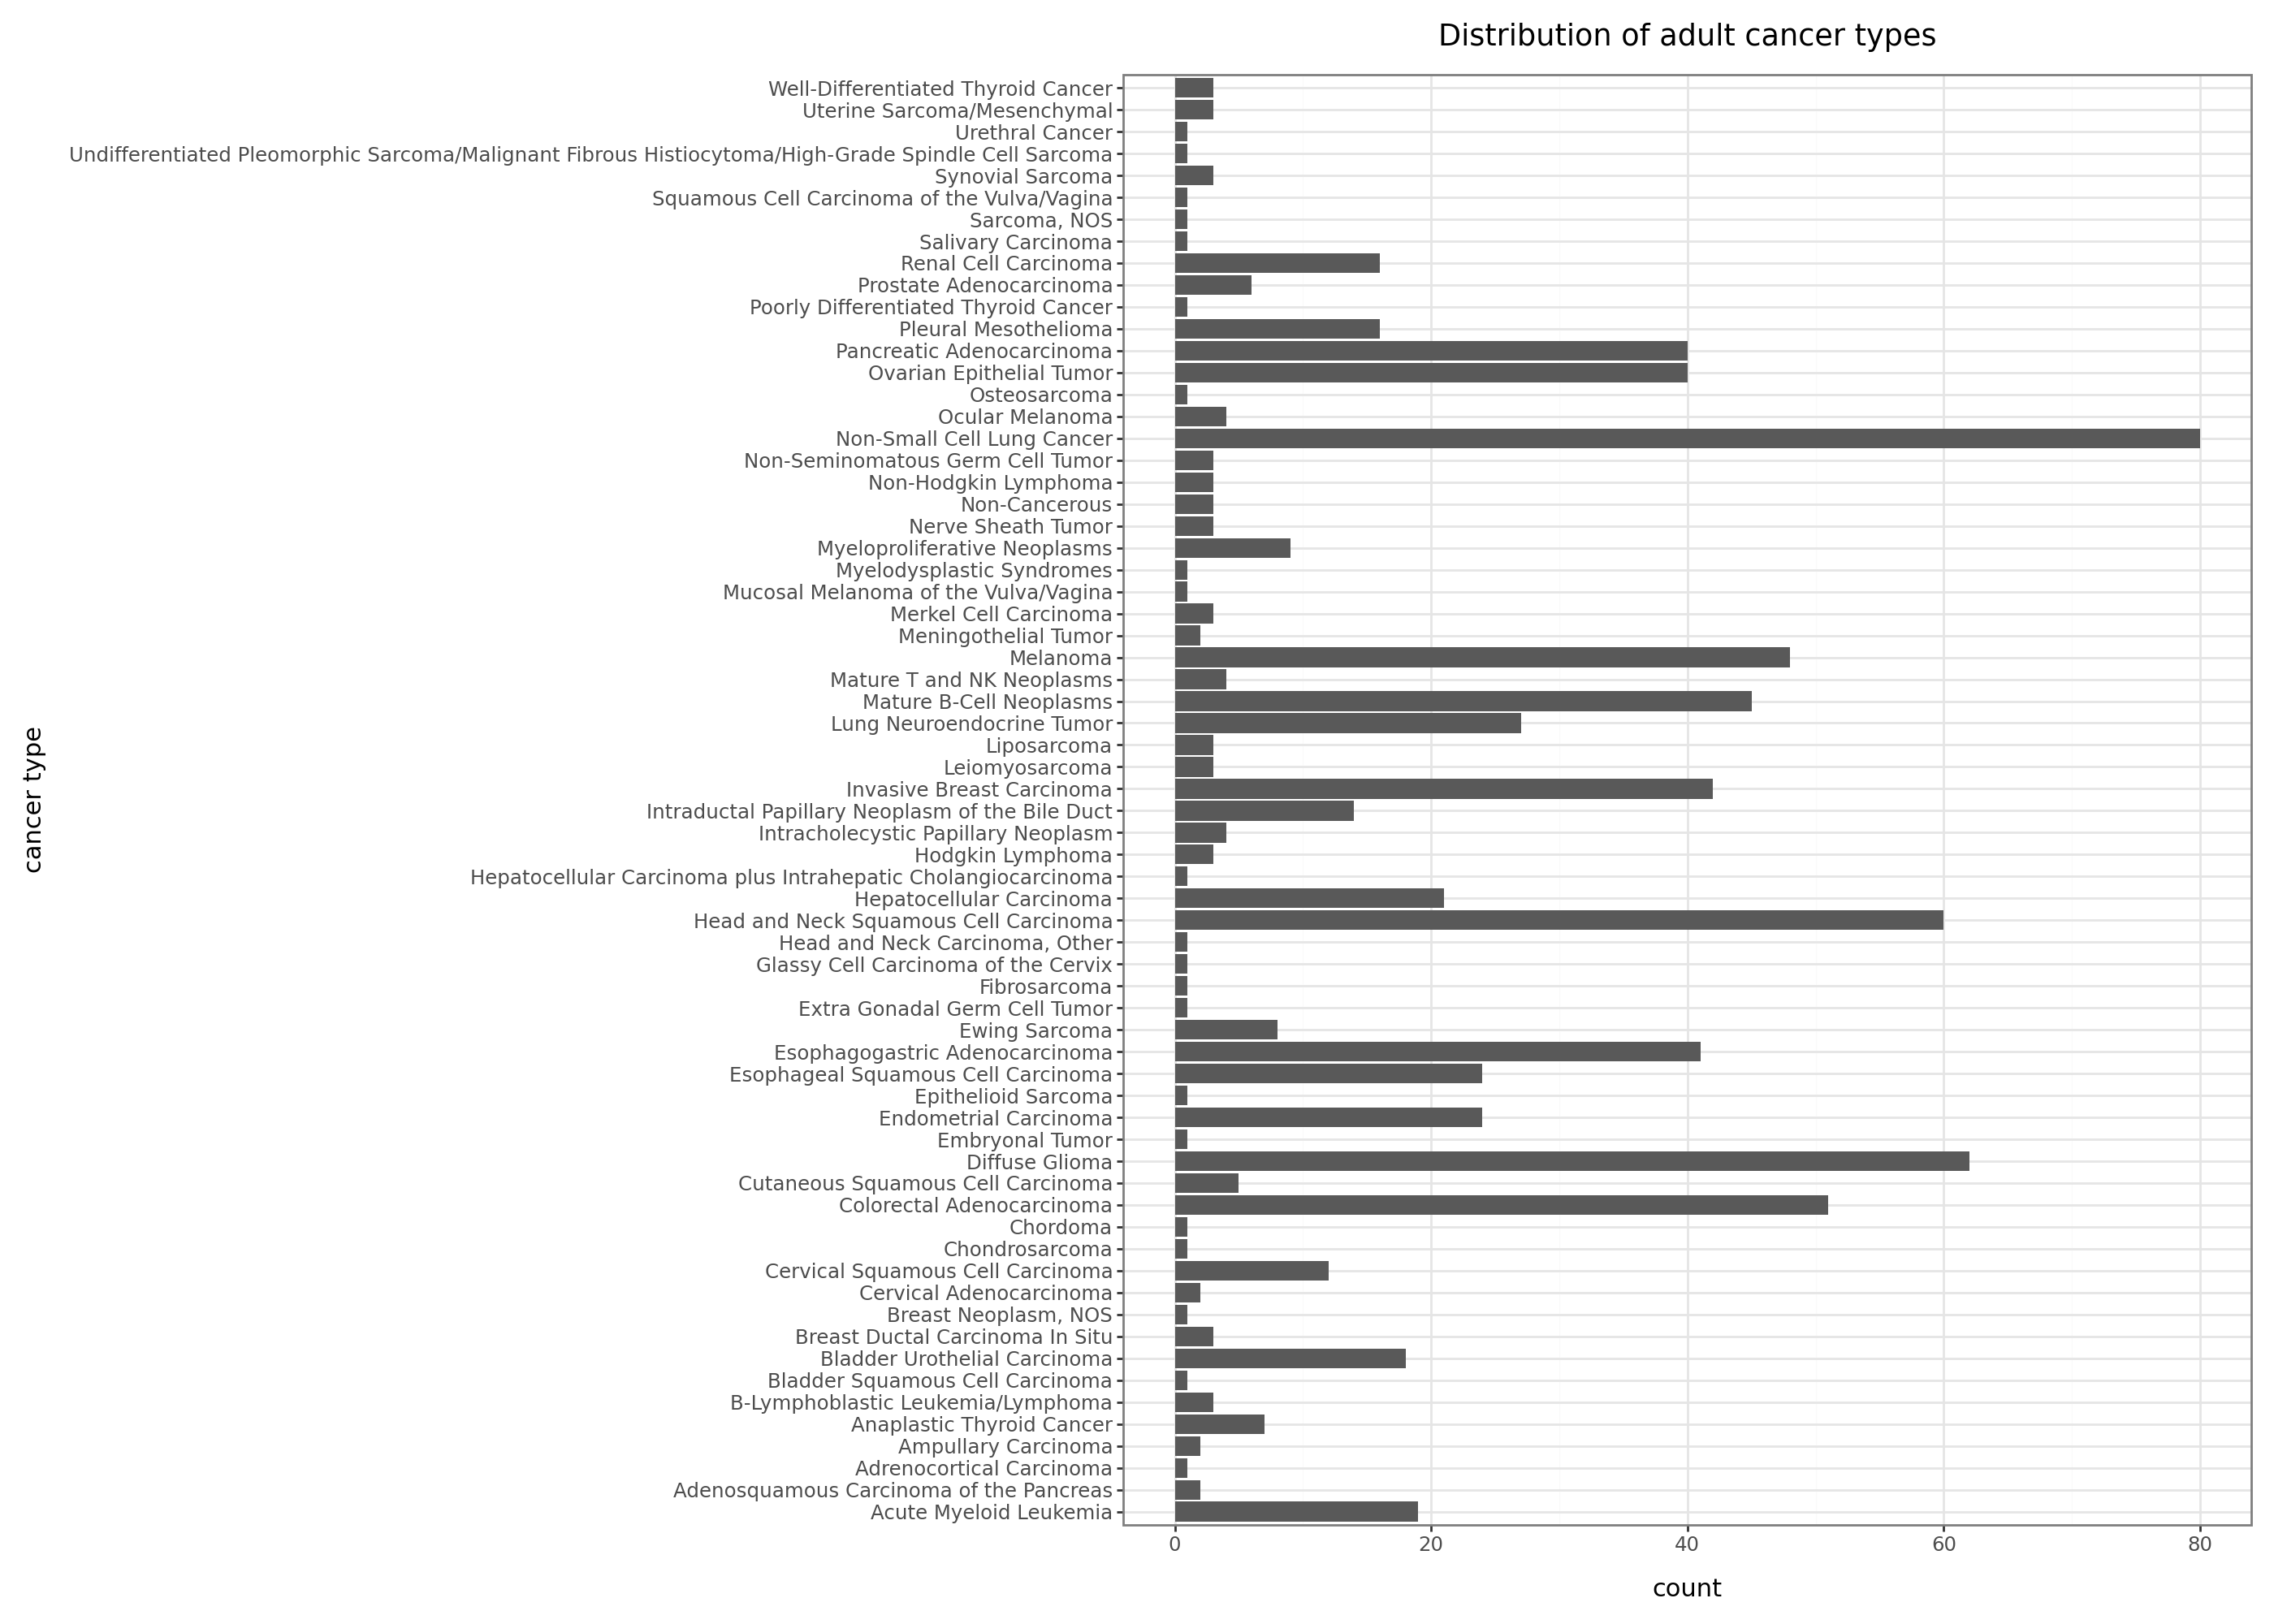

In [23]:
# Visualize adult cancer type distribution
adult_cancer_types_bar = (
    gg.ggplot(
        adult_cancer_counts.reset_index(), gg.aes(x="OncotreePrimaryDisease", y="cancer_type_count")
    )
    + gg.geom_bar(stat="identity")
    + gg.coord_flip()
    + gg.ggtitle("Distribution of adult cancer types")
    + gg.ylab("count")
    + gg.xlab("cancer type")
    + gg.theme_bw()
    + gg.theme(figure_size = (14, 10))
)

adult_cancer_types_bar.save(adult_cancer_type_output_figure, dpi=500, height=10, width=12)

adult_cancer_types_bar

In [24]:
# Adult solid vs liquid tumors
cancer_types = adult_model_df['OncotreePrimaryDisease'].tolist()

adult_liquid = []
adult_non_liquid = []

for cancer_type in cancer_types:
    if liquid_tumors[0] in cancer_type or liquid_tumors[1] in cancer_type:
        adult_liquid.append(cancer_type)
    else:
        adult_non_liquid.append(cancer_type)

print("The number of adult solid tumors:")
print(len(adult_non_liquid))

print("The number of adult liquid tumors:")
print(len(adult_liquid))

The number of adult solid tumors:
787
The number of adult liquid tumors:
28
